# Trabajo Semanal 4
### Renata Salvati Dávila
***

<img src="./Plantilla.png" align="center" /> 

**1. Obtener la transferencia de máxima planicidad del filtro requerido.**
<img src="./Hoja1.jpeg" align="center" /> 

In [2]:
# Inicialización e importación de módulos

# Módulos externos
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import math

from matplotlib import pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, bodePlot, pzmap, tf2sos_analog, pretty_print_SOS


fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [3]:
#Datos de enunciado para filtro pasa altos
a_max = 1
a_min = 30

fp = 40000
fs = 10000

nf = 2*np.pi*fp #norma de frecuencia

wp = (2*np.pi*fp)/nf
ws = (2*np.pi*fs)/nf

#Conversión de parámetros para un filtro pasa bajos equivalente

wp_ = 1/wp
ws_ = 1/ws

#Obtención de epsilon y n
e2 = 10**(a_max/10) - 1

for aux_n in range(2,5):
    aux_a_min = 10*np.log10(1 + e2*ws_**(2*aux_n))
    
    if aux_a_min > a_min:
        n = aux_n
        break
        
print(f"Parámetros del filtro pasa bajos equivalente: \ne² = {e2}, n = {n}")

Parámetros del filtro pasa bajos equivalente: 
e² = 0.2589254117941673, n = 3


In [4]:
nf2 = e2**(-1/2/n) #segunda norma de frecuencia (e⁻(1/n))

#Obtención de la transferencia
z, p, k = sig.buttap(n)
num_n, den_n = sig.zpk2tf(z, p, k)
num, den = sig.lp2lp(num_n, den_n, nf2) #desnormalización por segunda norma de frecuencia (e⁻(1/n))

Hpb_n = sig.TransferFunction(num_n, den_n)
Hpb = sig.TransferFunction(num, den)

pretty_print_lti(num_n, den_n)
pretty_print_lti(num, den)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
#Busco las funciones transferencias de primer y segundo orden que componen la original
num1_ = [1.]
den1_ = [1., 1.]

num2_ = [1.]
den2_ = [1., 1., 1.]

#Busco ahora las que corresponden al pasa altos
num1, den1 = sig.lp2hp(num1_, den1_)
num2, den2 = sig.lp2hp(num2_, den2_)

#Busco el polinomio completo de la transferencia
num = np.polymul(num1, num2)
den = np.polymul(den1, den2)

pretty_print_lti(num, den)

<IPython.core.display.Math object>

**2. Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia. Compare el diagrama de polos y ceros con el del filtro pasabajo prototipo.**

<img src="./Hoja2.jpeg" align="center" /> 
<img src="./Hoja3.jpeg" align="center" /> 

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

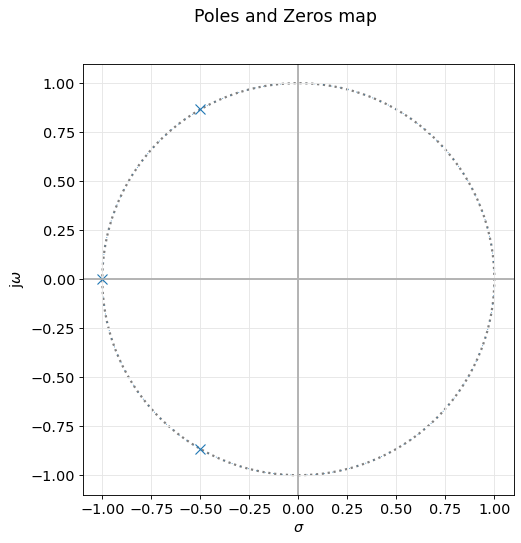

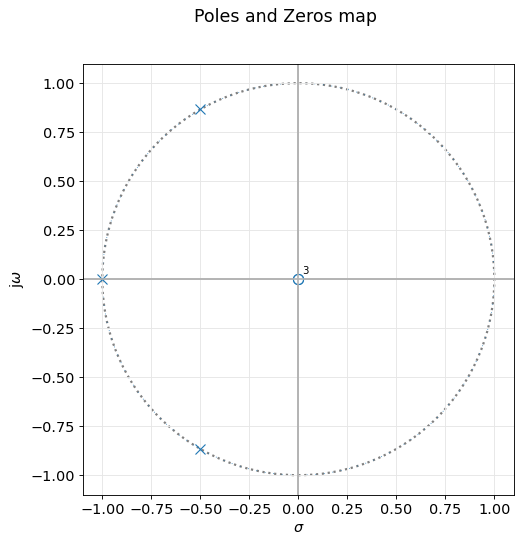

In [7]:
pzmap(Hpb_n)
pzmap(sig.TransferFunction(num, den))

**3. Implementar el circuito normalizado con estructuras pasivas. (Puede utilizar dispositivos activos para separar secciones).**
<img src="./Hoja4.jpeg" align="center" /> 

In [8]:
#Fijo el valor de los valores normalizados de los capacitores
R1_ = 1.0
R2_ = 1.0

L1_ = R1_
C1_ = 1/L1_
C2_ = 1/R2_

print(f"Valores de los componentes normalizados: \nR1_ = {R1_}, R2_ = {R2_}, C1_ = {C1_}, C2_ = {C2_}, L1_ = {L1_}")

Valores de los componentes normalizados: 
R1_ = 1.0, R2_ = 1.0, C1_ = 1.0, C2_ = 1.0, L1_ = 1.0


<img src="./Circuito normalizado.png" align="center" width="800" /> 
<img src="./Simulación normalizada.png" align="center" width="1000" /> 

**5. Reemplace los inductores en las estructuras pasivas mediante el GIC de Antoniou, en la configuración que considere más apropiada.**
<img src="./Hoja5.jpeg" align="center" /> 

In [9]:
#Busco los valores normalizados de las impedancias de los GIC (fijo R = 1)
R_ = 1.0
C_ = 1/R_**2

print(f"Valores de los componentes normalizados: \nC_ = {C_}, R_ = {R_}")

#Desnormalizo todos los componentes para verificar que todo el procedimiento haya sido el correcto
ni = 10**3 #norma de impedancia

R = R1 = R2 = ni
C = C1 =  C2 = 1/(ni * nf * (nf2**-1))

print(f"Valores de los componentes desnormalizados: \nC = C1 = C2 = {C}, R = R1 = R2 {R}")

Valores de los componentes normalizados: 
C_ = 1.0, R_ = 1.0
Valores de los componentes desnormalizados: 
C = C1 = C2 = 4.983843094480076e-09, R = R1 = R2 1000


<img src="./Circuito GIC.png" align="center" width="800" /> 
<img src="./Simulación GIC.png" align="center" width="1000" /> 

## Observaciones

Ante la implementación pasiva de un circuito con inductores, se los puede reemplazar por el GIC Antoniou siguiendo cierta configuración en sus componentes para que su impedancia de entrada sea como un inductor equivalente; esto se puede lograr usando un capacitor en una de las impedancias de numerador par y los demás como resistencias.

Anteriormente para la etapa de primer orden se había utilizado un circuito RL pero después se reemplazó por uno RC ya que se podía seguir cumpliendo el pasa-altos y de esta forma se evitó utilizar un segundo GIC.